In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.metrics import r2_score
import datapane as dp

In [2]:
df = pd.read_csv('global_power_plant_database.csv')


In [3]:
#Muestra de 10 filas
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
6636,CHN,China,Huaneng Shanghai Chongming Qianwei,WRI1071721,20.0,31.7005,121.6050,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.11
28276,USA,United States of America,Green Lake Solar,USA0063019,1.0,44.7767,-85.6923,Solar,NaN,2018.0,...,NaN,NaN,NaN,1.288,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,1.62
6572,CHN,China,Huaneng Daqing Heping,WRI1072061,48.0,46.2583,124.4744,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.06
15153,IND,India,PaSP} Fortum O1,WKS0066936,50.0,14.2430,77.4670,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,107.98,105.48,108.71,116.25,108.18
29274,USA,United States of America,Kenyon Municipal,USA0001983,5.4,44.2718,-92.9848,Oil,NaN,1997.0,...,0.04100,0.01300,0.0190,0.023,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,3.16
15016,IND,India,NAGARJUNA SAGAR TPD,IND0000521,50.0,16.6260,79.4909,Hydro,NaN,2017.0,...,7.31325,41.91935,49.6704,NaN,Central Electricity Authority,222.88,215.64,207.09,137.47,168.26
12482,DEU,Germany,AVA Velsen,WRI1005581,15.8,49.2139,6.8345,Waste,NaN,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.24
19987,ZAF,South Africa,Solar Capital De Aar I,WRI1061287,75.0,-30.5788,24.0789,Solar,NaN,2014.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.01,173.11,199.94
16141,ITA,Italy,CENTRALE NATURNO,WRI1002868,175.0,46.6487,11.0051,Hydro,NaN,NaN,...,235.72500,213.24400,NaN,NaN,JRC-PPDB-OPEN,446.84,545.09,464.40,574.44,240.98
461,AUS,Australia,Emerald Solar Farm,AUS0000581,68.0,-23.5084,148.1347,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,168.44,158.36,162.84,169.95,160.88


<AxesSubplot:>

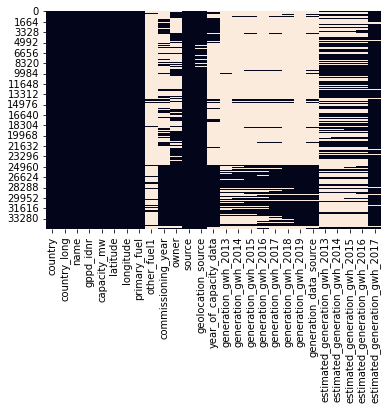

In [4]:
#heatmap para ver visualizar valores nulos
sns.heatmap(df.isnull(), cbar=False)

In [145]:
#Porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().sum() * 100 / len(df)
df_nulos = pd.DataFrame({'column_name': df.columns,
                                 'nulls_percentaje': porcentaje_nulos})
df_nulos

,column_name,nulls_percentaje
country,country,0.000000
country_long,country_long,0.000000
name,name,0.000000
gppd_idnr,gppd_idnr,0.000000
capacity_mw,capacity_mw,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
primary_fuel,primary_fuel,0.000000
other_fuel1,other_fuel1,94.435539
commissioning_year,commissioning_year,50.060110


In [6]:
#Tipos de datos
df.dtypes

country                           object
country_long                      object
name                              object
gppd_idnr                         object
capacity_mw                      float64
latitude                         float64
longitude                        float64
primary_fuel                      object
other_fuel1                       object
commissioning_year               float64
owner                             object
source                            object
geolocation_source                object
year_of_capacity_data            float64
generation_gwh_2013              float64
generation_gwh_2014              float64
generation_gwh_2015              float64
generation_gwh_2016              float64
generation_gwh_2017              float64
generation_gwh_2018              float64
generation_gwh_2019              float64
generation_data_source            object
estimated_generation_gwh_2013    float64
estimated_generation_gwh_2014    float64
estimated_genera

In [7]:
#Muestra países (sin duplicar)
for item in df['country_long'].unique():
    print(item)

Afghanistan
Albania
Algeria
Angola
Antarctica
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chile
China
Colombia
Congo
Costa Rica
Cote DIvoire
Croatia
Cuba
Cyprus
Czech Republic
Democratic Republic of the Congo
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
French Guiana
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guinea-Bissau
Guyana
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Netherlands
New Zealand
Nica

In [8]:
#tipos de combustible
for item in df['primary_fuel'].unique():
    print(item)

Hydro
Solar
Gas
Other
Oil
Wind
Nuclear
Coal
Waste
Biomass
Wave and Tidal
Petcoke
Geothermal
Storage
Cogeneration


In [9]:
#Conteo de combustible primario
data = df
pfuel_df = data[['primary_fuel']].groupby(['primary_fuel']).size().reset_index(name='Conteo').sort_values('Conteo', ascending = False)
pfuel_df

,primary_fuel,Conteo
10,Solar,10665
5,Hydro,7156
14,Wind,5344
3,Gas,3998
1,Coal,2330
7,Oil,2320
0,Biomass,1430
12,Waste,1068
6,Nuclear,195
4,Geothermal,189


In [10]:
fuelcapacity_df = pd.DataFrame({'fuel': df.primary_fuel,
                                 'capacity_mean': df.capacity_mw})
#solarcapacity_df2=solarcapacity_df[solarcapacity_df["total_solar"] == "Solar"]

fuelcapacity_df2 = fuelcapacity_df.pivot_table('capacity_mean', ['fuel'], aggfunc='mean').reset_index().sort_values('capacity_mean', ascending = False)

fuelcapacity_df2.head(25)

,fuel,capacity_mean
6,Nuclear,2091.855179
1,Coal,843.579828
3,Gas,373.449375
9,Petcoke,202.048125
5,Hydro,147.171551
7,Oil,112.878754
2,Cogeneration,98.731707
8,Other,84.020000
4,Geothermal,67.130952
13,Wave and Tidal,55.220000


In [11]:
sumfuelcapacity_df = pd.DataFrame({'fuel': df.primary_fuel,
                                 'capacidad_total': df.capacity_mw})
#solarcapacity_df2=solarcapacity_df[solarcapacity_df["total_solar"] == "Solar"]

sumfuelcapacity_df2 = sumfuelcapacity_df.pivot_table('capacidad_total', ['fuel'], aggfunc='sum').reset_index().sort_values('capacidad_total', ascending = False)

sumfuelcapacity_df2.head(25)

,fuel,capacidad_total
1,Coal,1.965541e+06
3,Gas,1.493051e+06
5,Hydro,1.053160e+06
6,Nuclear,4.079118e+05
14,Wind,2.630537e+05
7,Oil,2.618787e+05
10,Solar,1.883123e+05
0,Biomass,3.428130e+04
12,Waste,1.474871e+04
4,Geothermal,1.268775e+04


In [12]:
#conteo de países
data = df
country_df = data[['country_long']].groupby(['country_long']).size().reset_index(name='Conteo').sort_values('Conteo', ascending = False)
country_df.head(10)

,country_long,Conteo
158,United States of America,9833
30,China,4235
157,United Kingdom,2751
19,Brazil,2360
52,France,2155
67,India,1589
57,Germany,1309
26,Canada,1159
137,Spain,829
125,Russia,545


In [13]:
#Conteo commissioning year (año en que produjeron electricidad por primera vez)
data = df
commyear_df = data[['commissioning_year']].groupby(['commissioning_year']).size().reset_index(name='Conteo').sort_values('Conteo', ascending = False)
commyear_df.head(10)


,commissioning_year,Conteo
118,2016.0,879
116,2014.0,823
117,2015.0,822
119,2017.0,783
114,2012.0,769
115,2013.0,687
113,2011.0,618
120,2018.0,617
121,2019.0,599
111,2009.0,569


In [14]:
#conteo de capacidad en mw ¿qué capacidades son más frecuentes?
data = df
capacitymw_df = data[['capacity_mw']].groupby(['capacity_mw']).size().reset_index(name='Conteo').sort_values('Conteo', ascending = False)
capacitymw_df.head(10)

,capacity_mw,Conteo
1124,5.0,1254
1440,10.0,972
0,1.0,932
1856,20.0,879
550,2.0,841
2355,49.0,582
2087,30.0,526
790,3.0,477
2370,50.0,455
1563,12.0,447


In [96]:
#promedio de capacidad en mw por año

capacity_per_year_df = df.pivot_table('capacity_mw', ['commissioning_year'], aggfunc='mean').reset_index().sort_values('commissioning_year', ascending = False)

capacity_per_year_df.head(10)
#df["capacity_average"] = capacitymw_peryear_df["capacity_mw"].div(capacitymw_df["Conteo"].values)


,commissioning_year,capacity_mw
122,2020.0,37.973333
121,2019.0,39.584641
120,2018.0,64.055105
119,2017.0,75.718378
118,2016.0,149.895765
117,2015.0,164.425041
116,2014.0,153.729613
115,2013.0,222.163673
114,2012.0,173.074267
113,2011.0,179.954444


In [89]:
#TOTAL de capacidad en mw por año

capacity_per_year_sum_df = df.pivot_table('capacity_mw', ['commissioning_year'], aggfunc='sum').reset_index().sort_values('capacity_mw', ascending = False)

capacity_per_year_sum_df.head(20)
#df["capacity_average"] = capacitymw_peryear_df["capacity_mw"].div(capacitymw_df["Conteo"].values)


,commissioning_year,capacity_mw
115,2013.0,152626.44336
112,2010.0,144959.95100
104,2002.0,140644.53900
105,2003.0,138118.88882
117,2015.0,135157.38349
114,2012.0,133094.11120
118,2016.0,131758.37754
108,2006.0,131211.88620
116,2014.0,126519.47138
111,2009.0,124619.17340


In [17]:
#conteo de plantas solares por año (solar, gas, coal, oil)
solarcount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_solar': df.primary_fuel})
solarcount_df2=solarcount_df[solarcount_df["total_solar"] == "Solar"]
data = solarcount_df2
solarcount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='planta_solar').sort_values('comm_year', ascending = False)
solarcount_df3.head(50)

,comm_year,planta_solar
19,2020.0,122
18,2019.0,458
17,2018.0,480
16,2017.0,523
15,2016.0,464
14,2015.0,343
13,2014.0,373
12,2013.0,236
11,2012.0,229
10,2011.0,145


In [18]:
#capacidad mw en plantas solares por año solarcount_df3
solarcapacity_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_solar': df.primary_fuel,
                                 'capacity_solar': df.capacity_mw,
                                 'conteo': solarcount_df3.planta_solar})
solarcapacity_df2=solarcapacity_df[solarcapacity_df["total_solar"] == "Solar"]


solarcapacity_df3 = solarcapacity_df2.pivot_table('capacity_solar', ['comm_year'], aggfunc='mean').reset_index().sort_values('comm_year', ascending = False)
solarcapacity_df4 = solarcapacity_df3[solarcapacity_df3["comm_year"] >= 2002] 

bubblesolar_df = pd.concat([solarcapacity_df4, solarcount_df3['planta_solar']], axis=1, join="inner")
bubblesolar_df.head(25)
#solarcapacity_df4.head(25)

,comm_year,capacity_solar,planta_solar
19,2020.0,16.845082,122
18,2019.0,10.565284,458
17,2018.0,11.237083,480
16,2017.0,13.216826,523
15,2016.0,16.263578,464
14,2015.0,12.606122,343
13,2014.0,11.304050,373
12,2013.0,20.278814,236
11,2012.0,10.254541,229
10,2011.0,7.922779,145


In [19]:
##conteo de plantas de gas por año (solar, gas, coal, oil)
gascount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_gas': df.primary_fuel})
gascount_df2=gascount_df[gascount_df["total_gas"] == "Gas"]
data = gascount_df2
gascount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='planta_gas').sort_values('planta_gas', ascending = False)
gascount_df3.head(10)

,comm_year,planta_gas
76,2002.0,150
75,2001.0,126
77,2003.0,114
78,2004.0,100
74,2000.0,97
79,2005.0,89
82,2008.0,75
86,2012.0,69
88,2014.0,68
87,2013.0,68


In [20]:
#capacidad mw de gas por año
gascapacity_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_gas': df.primary_fuel,
                                 'capacity_gas': df.capacity_mw})
gascapacity_df2=gascapacity_df[gascapacity_df["total_gas"] == "Gas"]

gascapacity_df3 = gascapacity_df2.pivot_table('capacity_gas', ['comm_year'], aggfunc='mean').reset_index().sort_values('capacity_gas', ascending = False)
gascapacity_df4 = gascapacity_df3[gascapacity_df3["comm_year"] >= 1950] 

gascapacity_df4.head(10)

,comm_year,capacity_gas
53,1979.0,1047.160000
30,1956.0,775.500000
26,1952.0,674.333333
45,1971.0,597.295238
77,2003.0,595.243289
57,1983.0,589.881250
40,1966.0,581.016667
88,2014.0,511.412353
78,2004.0,508.418417
84,2010.0,504.728983


In [21]:
#conteo de plantas de carbón por año (solar, gas, coal, oil)
coalcount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_coal': df.primary_fuel})
coalcount_df2=coalcount_df[coalcount_df["total_coal"] == "Coal"]
data = coalcount_df2
coalcount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='planta_coal').sort_values('planta_coal', ascending = False)
coalcount_df3.head(10)

,comm_year,planta_coal
78,2010.0,85
84,2016.0,84
74,2006.0,83
75,2007.0,80
80,2012.0,79
83,2015.0,75
76,2008.0,72
79,2011.0,68
77,2009.0,61
81,2013.0,60


In [22]:
#conteo de plantas de petroleo por año 
oilcount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_oil': df.primary_fuel})
oilcount_df2=oilcount_df[oilcount_df["total_oil"] == "Oil"]
data = oilcount_df2
oilcount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='planta_oil').sort_values('planta_oil', ascending = False)
oilcount_df3.head(10)

,comm_year,planta_oil
67,2010.0,76
59,2002.0,73
69,2012.0,69
70,2013.0,64
58,2001.0,63
62,2005.0,54
68,2011.0,54
57,2000.0,52
66,2009.0,50
72,2015.0,45


In [23]:
#conteo de plantas eólicas por año 
windcount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_wind': df.primary_fuel})
windcount_df2=oilcount_df[windcount_df["total_wind"] == "Wind"]
data = windcount_df2
windcount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='planta_wind').sort_values('planta_wind', ascending = False)
windcount_df3.head(10)

,comm_year,planta_wind
27,2009.0,196
33,2015.0,195
32,2014.0,181
34,2016.0,169
30,2012.0,156
26,2008.0,140
29,2011.0,139
24,2006.0,121
25,2007.0,111
35,2017.0,105


In [137]:
#conteo de plantas nucleares por año 
nuclearcount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_nuclear': df.primary_fuel})
nuclearcount_df2=oilcount_df[nuclearcount_df["total_nuclear"] == "Nuclear"]
data = nuclearcount_df2
nuclearcount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='nuclear_plant').sort_values('nuclear_plant', ascending = False)
nuclearcount_df3.head(50)



,comm_year,nuclear_plant
16,1985.0,12
15,1984.0,10
19,1988.0,7
18,1987.0,6
17,1986.0,5
5,1974.0,5
7,1976.0,5
10,1979.0,4
12,1981.0,4
4,1973.0,4


In [25]:
hydrocount_df = pd.DataFrame({'comm_year': df.commissioning_year,
                                 'total_hydro': df.primary_fuel})
hydrocount_df2=oilcount_df[hydrocount_df["total_hydro"] == "Hydro"]
data = hydrocount_df2
hydrocount_df3 = data[['comm_year']].groupby(['comm_year']).size().reset_index(name='planta_hydro').sort_values('planta_hydro', ascending = False)
hydrocount_df3.head(10)


,comm_year,planta_hydro
114,2012.0,90
112,2010.0,87
113,2011.0,86
111,2009.0,77
87,1985.0,75
115,2013.0,73
110,2008.0,72
88,1986.0,65
90,1988.0,64
117,2015.0,62


In [52]:
#10 países con más plantas energéticas
country_dfa = country_df.head(10)

fig1_country_dist = px.pie(country_dfa, values='Conteo', names='country_long', title='Top 10 países con más plantas energéticas', template = 'plotly_dark')
fig1_country_dist.show()

In [ ]:
labels = {'x':"Fruits<br><sup>Fruit sales in the month of January</sup>", 
              'y':'count'}

In [53]:
#Conteo de fuentes de combustible
pfuel_dfa = pfuel_df.head(15).sort_values('Conteo', ascending = True)

figpfuel = px.bar(pfuel_dfa, x='Conteo', y='primary_fuel', template = 'plotly_dark', title='Fuentes de combustible', color='Conteo', height=800)
figpfuel.show()

In [76]:
#Promedio de capacidad en mw por fuente de combustible
fuelcapacity_df2a = fuelcapacity_df2.head(15).sort_values('capacity_mean', ascending = False)

figfuelcapacity = px.bar(fuelcapacity_df2a, x='fuel', y='capacity_mean', template = 'ggplot2', title='Average capacity in MW by fuel type', color='capacity_mean')
figfuelcapacity.show()

In [30]:
# capacidad total por fuente de combustible
sumfuelcapacity_df2a = sumfuelcapacity_df2.head(15).sort_values('capacidad_total', ascending = False)

fig = px.bar(sumfuelcapacity_df2a, x='fuel', y='capacidad_total', template = 'plotly_dark', title='Capacidad total por fuente de combustible', color='capacidad_total')
fig.show()

In [142]:
#Conteo de fuentes de combustible
sumfuelcapacity_df2a = sumfuelcapacity_df2.head(15).sort_values('capacidad_total', ascending = True)

figsumfuelcapacity = px.pie(sumfuelcapacity_df2a, values='capacidad_total', names='fuel', template = 'plotly', title='Distribution of total capacity by fuel type', color='capacidad_total')
figsumfuelcapacity.show()

{'Solar': 1, 'Hydro': 1, 'Wind': 1, 'Gas': 1, 'Coal': 1, 'Oil': 1, 'Biomass': 1, 'Waste': 1, 'Nuclear': 1, 'Geothermal': 1, 'Storage': 1, 'Other': 1, 'Cogeneration': 1, 'Petcoke': 1, 'Wave and Tidal': 1}


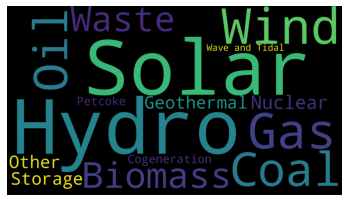

In [32]:
#wordcloud

from wordcloud import WordCloud 

energytype_dfa = pfuel_dfa.sort_values('Conteo', ascending = False)

data = energytype_dfa['primary_fuel'].value_counts().to_dict()
print(data)
wc = WordCloud(width =1920, 
        height =1080, background_color= 'black').generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [33]:
#seleccionar datos del eje x y y, luego convertir datos a log oara ajuste matemático
x_data = commyear_df["commissioning_year"].head(100)
y_data = commyear_df["Conteo"].head(100)

log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

#calcular r2
correlation_matrix = np.corrcoef(log_x_data, log_y_data)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.8964425115980864


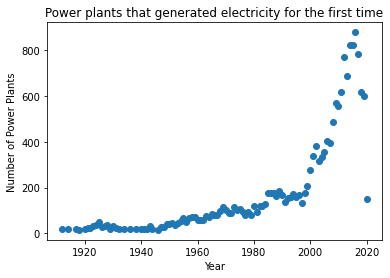

In [63]:
#Visualización de nuevas plantas y el año
plt.scatter(x_data, y_data)
plt.title("Power plants that generated electricity for the first time")
plt.xlabel("Year")
plt.ylabel("Number of Power Plants")
plt.show()


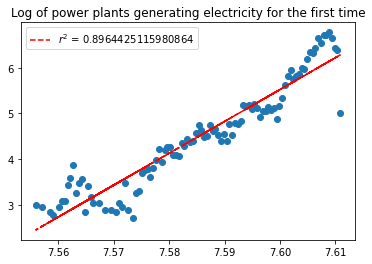

In [64]:
#Ajuste a modelo exponencial. Incluye linea de tendencia y r2.

plt.scatter(log_x_data, log_y_data)

z = np.polyfit(log_x_data, log_y_data, 1)
p = np.poly1d(z)
plt.plot(log_x_data,p(log_x_data),"r--", label=f"$r^2$ = {r_squared}")
plt.title("Log of power plants generating electricity for the first time")
plt.legend()


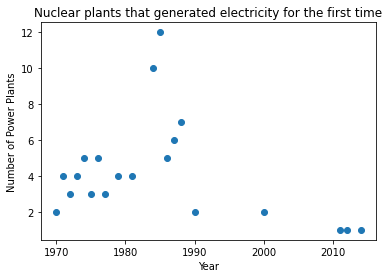

In [133]:
nuk_x_data = nuclearcount_df3["comm_year"].head(20)
nuk_y_data = nuclearcount_df3["nuclear_plant"].head(20)
plt.scatter(nuk_x_data, nuk_y_data)
plt.title("Nuclear plants that generated electricity for the first time")
plt.xlabel("Year")
plt.ylabel("Number of Power Plants")
plt.show()

In [139]:
nukplants_chart = px.bar(nuclearcount_df3, x='comm_year', y='nuclear_plant', template = 'ggplot2', title='Nuclear plants that generated electricity for the first time', color='nuclear_plant')
nukplants_chart.show()

In [36]:
#Conteo de combustible por año
df_yearcap = pd.DataFrame({'commissioning_year': df.commissioning_year,
                                 'capacity_mw': df.capacity_mw}).groupby(['commissioning_year']).size().reset_index(name='capacity_mw').sort_values('capacity_mw', ascending = False)
df_yearcap.head(10)

,commissioning_year,capacity_mw
118,2016.0,879
116,2014.0,823
117,2015.0,822
119,2017.0,783
114,2012.0,769
115,2013.0,687
113,2011.0,618
120,2018.0,617
121,2019.0,599
111,2009.0,569


In [37]:
#r2 de capacidad promedio en mw por año ¿está incrementando?
x_data2 = capacity_per_year_df["commissioning_year"].head(100)
y_data2 = capacity_per_year_df["capacity_mw"].head(100)

log_x_data2 = np.log(x_data2)
log_y_data2 = np.log(y_data2)

#calcular r2
correlation_matrix2 = np.corrcoef(x_data2, y_data2)
correlation_xy2 = correlation_matrix2[0,1]
r_squared2 = correlation_xy2**2

print(r_squared2)

0.20420193167412812


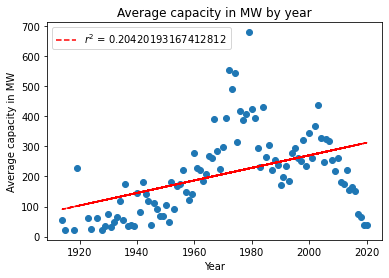

In [70]:
#scatter plot capacidad promedio en mw por año
plt.scatter(x_data2, y_data2)

z = np.polyfit(x_data2, y_data2, 1)
p = np.poly1d(z)
plt.plot(x_data2,p(x_data2),"r--", label=f"$r^2$ = {r_squared2}")
plt.title("Average capacity in MW by year")
plt.xlabel("Year")
plt.ylabel("Average capacity in MW")
plt.legend()


In [39]:
#capacidad total por año, datos de x y y en log
sum_x_data = capacity_per_year_sum_df["commissioning_year"].head(100)
sum_y_data = capacity_per_year_sum_df["capacity_mw"].head(100)

sum_log_x_data = np.log(sum_x_data)
sum_log_y_data = np.log(sum_y_data)

#calcular r2
sum_correlation_matrix = np.corrcoef(sum_log_x_data, sum_log_y_data)
sum_correlation_xy = sum_correlation_matrix[0,1]
sum_r_squared = sum_correlation_xy**2

print(sum_r_squared)

0.805311323994218


Text(0, 0.5, 'Capacity in MW')

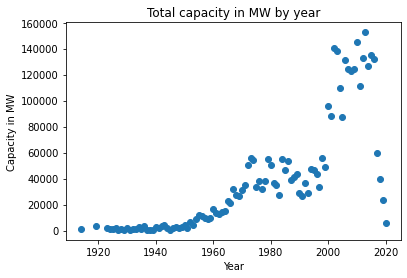

In [71]:
#gráfico de dispersión del aumento de la capacidad en mw por año
plt.scatter(sum_x_data, sum_y_data)

z = np.polyfit(sum_x_data, sum_y_data, 1)
p = np.poly1d(z)
plt.title("Total capacity in MW by year")
plt.xlabel("Year")
plt.ylabel("Capacity in MW")



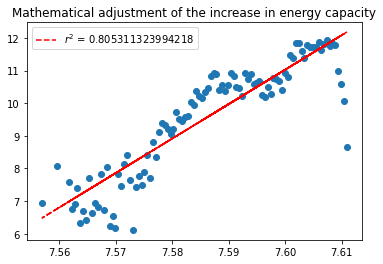

In [72]:
#ajuste matemático del gráfico de dispersión del aumento de la capacidad en mw por año

plt.scatter(sum_log_x_data, sum_log_y_data)

z = np.polyfit(sum_log_x_data, sum_log_y_data, 1)
p = np.poly1d(z)
plt.plot(sum_log_x_data,p(sum_log_x_data),"r--", label=f"$r^2$ = {sum_r_squared}")
plt.title("Mathematical adjustment of the increase in energy capacity")
plt.legend()


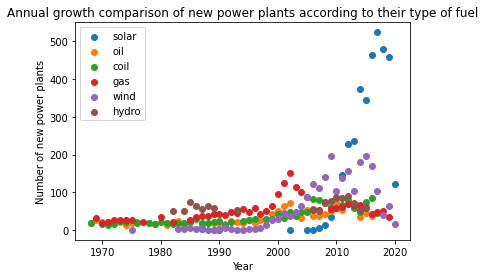

In [67]:
#cómo se compara el número de plantas de diferentes tipos de combustibles

#datos solar
solar_x_data = solarcount_df3["comm_year"].head(20)
solar_y_data = solarcount_df3["planta_solar"].head(20)
#datos gas
gas_x_data = gascount_df3["comm_year"].head(45)
gas_y_data = gascount_df3["planta_gas"].head(45)
#datos petroleo
oil_x_data = oilcount_df3["comm_year"].head(45)
oil_y_data = oilcount_df3["planta_oil"].head(45)
#datos carbón
coal_x_data = coalcount_df3["comm_year"].head(45)
coal_y_data = coalcount_df3["planta_coal"].head(45)
#datos eólica
wind_x_data = windcount_df3["comm_year"].head(50)
wind_y_data = windcount_df3["planta_wind"].head(50)
#datos hydro
hydro_x_data = hydrocount_df3["comm_year"].head(18)
hydro_y_data = hydrocount_df3["planta_hydro"].head(18)

plt.scatter(solar_x_data, solar_y_data, label='solar')
plt.scatter(oil_x_data, oil_y_data, label='oil')
plt.scatter(coal_x_data, coal_y_data, label='coil')
plt.scatter(gas_x_data, gas_y_data, label='gas')
plt.scatter(wind_x_data, wind_y_data, label='wind')
plt.scatter(hydro_x_data, hydro_y_data, label='hydro')


plt.legend(loc='upper left');

plt.title("Annual growth comparison of new power plants according to their type of fuel")
plt.xlabel("Year")
plt.ylabel("Number of new power plants")
plt.show()

In [43]:
#datos x y y solarmw
solarmw_x_data = solarcapacity_df4["comm_year"].head(18)
solarmw_y_data = solarcapacity_df4["capacity_solar"].head(18)



#calcular r2 de la capacidad solar a lo largo de los años
solarcapacity_correlation_matrix = np.corrcoef(solarmw_x_data, solarmw_y_data)
solarcapacity_correlation_xy = solarcapacity_correlation_matrix[0,1]
solarcapacity_r_squared = solarcapacity_correlation_xy**2

print(solarcapacity_r_squared)

0.45430192865666397


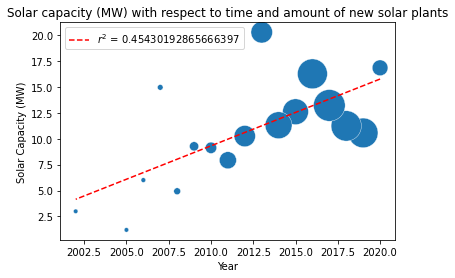

In [125]:
#capacidad solar en mw respecto al tiempo. El tamaño representa la cantidad de plantas solares que comenzaron a operar ese año.
solarmw_x_data = bubblesolar_df["comm_year"]
solarmw_y_data = bubblesolar_df["capacity_solar"]
solarmw_z_data = bubblesolar_df["planta_solar"]

#calcular r2
solarmw_correlation_matrix = np.corrcoef(solarmw_x_data, solarmw_y_data)
solarmw_correlation_xy = solarmw_correlation_matrix[0,1]
solarmw_r_squared = solarmw_correlation_xy**2

sns.scatterplot(data=data, x=solarmw_x_data, y=solarmw_y_data, size=solarmw_z_data, legend=False, sizes=(20, 1000))

z = np.polyfit(solarmw_x_data, solarmw_y_data, 1)
p = np.poly1d(z)
plt.plot(solarmw_x_data,p(solarmw_x_data),"r--", label=f"$r^2$ = {solarmw_r_squared}")

plt.title("Solar capacity (MW) with respect to time and amount of new solar plants")
plt.xlabel("Year")
plt.ylabel("Solar Capacity (MW)")
plt.legend()
plt.show()

In [100]:
inv_corr_renewcap_df = pd.DataFrame({'comm_year': bubblesolar_df.comm_year,
                                 'number_solar_pp': bubblesolar_df.planta_solar})
#capacity_per_year_df 

#datos capacity_per_year_df 
capacity_x_data = capacity_per_year_df["commissioning_year"].head(25)
capacity_y_data = capacity_per_year_df["capacity_mw"].head(25)
#datos inv_corr_renewcap_df
solar2_x_data = bubblesolar_df["comm_year"].head(50)
solar2_y_data = bubblesolar_df["planta_solar"].head(50)

plt.scatter(solar2_x_data, solar2_y_data, label='Plantas nuevas de energía solar')
plt.scatter(capacity_x_data, capacity_y_data, label='Capacidad en MW promedio')


plt.legend(loc='upper left');

plt.title("Correlación inversa entre plantas nuevas de energía solar y capacidad promedio")
plt.xlabel("Year")
plt.ylabel("Number of new power plants")
plt.show()

,comm_year,number_solar_pp
19,2020.0,122
18,2019.0,458
17,2018.0,480
16,2017.0,523
15,2016.0,464
14,2015.0,343
13,2014.0,373
12,2013.0,236
11,2012.0,229
10,2011.0,145


In [112]:
capacity_per_year_df = capacity_per_year_df.rename(columns={"commissioning_year":"comm_year"})


inverse_corr_caprenew = pd.concat([commyear_df, capacity_per_year_df['capacity_mw']], axis=1, join="inner")


ic_x_data = inverse_corr_caprenew["Conteo"].head(20)
ic_y_data = inverse_corr_caprenew["capacity_mw"].head(20)



#calcular r2
ic_correlation_matrix = np.corrcoef(ic_x_data, ic_y_data)
ic_correlation_xy = ic_correlation_matrix[0,1]
ic_r_squared = ic_correlation_xy**2

print(ic_r_squared)

0.5837843106040296


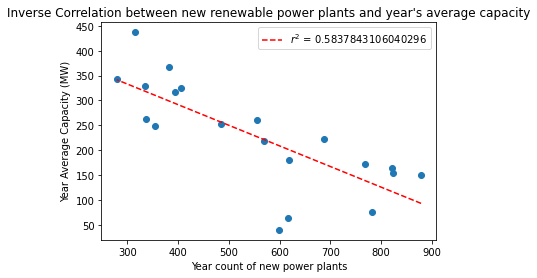

In [120]:
plt.scatter(ic_x_data, ic_y_data)
z = np.polyfit(ic_x_data, ic_y_data, 1)
p = np.poly1d(z)
plt.plot(ic_x_data,p(ic_x_data),"r--", label=f"$r^2$ = {ic_r_squared}")
plt.title("Inverse Correlation between new renewable power plants and year's average capacity")
plt.xlabel("Year count of new power plants")
plt.ylabel("Year Average Capacity (MW)")
plt.legend()

In [ ]:
plt.scatter(sum_log_x_data, sum_log_y_data)

z = np.polyfit(sum_log_x_data, sum_log_y_data, 1)
p = np.poly1d(z)
plt.plot(sum_log_x_data,p(sum_log_x_data),"r--", label=f"$r^2$ = {sum_r_squared}")
plt.title("Mathematical adjustment of the increase in energy capacity")
plt.legend()

In [147]:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Asteriason/worldenergydata.git
git push -u origin main

SyntaxError: invalid syntax (160599521.py, line 1)